#The Titanic Dataset

El objetivo de esta práctica de Laboratorio es predecir que pasajeros del Titanic sobreviven al hundimiento del Titanic. 

Se verá como leer datasets, analizarlo y seleccionar campos. Además, se pondrá a prueba el SVM en un problema de clasificación lineal. 

ref = https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

|Variable | Description| Values| |-------------------------------| | survival| Survival| (0 = No; 1 = Yes)| |Pclass |Name | | |Sex |Sex | male, female| |Age |Age| |SibSp |Number of Siblings/Spouses Aboard|| |Parch |Number of Parents/Children Aboard|| |Ticket|Ticket Number|| |Fare |Passenger Fare|| |Cabin |Cabin|| |Embarked |Port of Embarkation| (C = Cherbourg; Q = Queenstown; S = Southampton)|

The definitions used for SibSp and Parch are:
*   Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

*   Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

*   Parent: Mother or Father of Passenger Aboard Titanic
*   Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic











##Leer el dataset

En mi caso, por comodidad, voy a leer los archivos csv directamente desde mi Github. 

In [102]:
#Imports lo primero
import numpy as np
import pandas as pd
from pandas import Series, DataFrame



import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots

#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline




In [103]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

url_test_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/test.csv'
url_train_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/train.csv'

df = pd.read_csv(url_train_titanic)


In [30]:
#891 filas x 12 columnas
df.shape

(891, 12)

In [31]:
#para que me saque cinco filas a partir de la cabecera, que en este caso se selecciona en el primer registro. Podríamos usar otro. 
df_5rows = pd.read_csv(url_train_titanic, header=0, nrows=5)
df_5rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


##Introducción a Pandas

Pandas es una librería que facilita el manejo de datasets. Es compatible con dos tipos de estructuras: Series (objeto de una dimensión) y DataFrames (como lo que hemos visto hasta ahora). 




In [32]:
# Show the first 5 rows
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.info()
#podemos ver el nombre de las columnas, es decir, el tipo de dato de cada pasajero: si ha sobrevivido, nombre, sexo, edad etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.dtypes[df.dtypes == object]
#podemos elegir seleccionar los datos no numéricos


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [35]:
# Describe statistics of relevant columns. We pass a list of columns
#Podemos ver estadísticas, en cada campo, por ejemplo la media de super
df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].describe()


,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
#numero de hombres (577) y numero de mujeres (314)
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
100 * df['Pclass'].value_counts() / len(df['Pclass'])
#podemos ver porcentualmente que los pasajeros clase 1 son el 24%, la 2 el 20 y la 3 el 55


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [38]:
#Datos nulos por columna, muy util a la hora de limpiar y preprocesar
#Menos la edad y la cabina (y dos embarcados, que es despreciable) no hay campos nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df.shape

(891, 12)

In [47]:
#Pasajeros mayores de 20 y hombres
# Select based on boolean vector and show last 5 columns
df[df.Age > 20][-5:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [48]:
# Number of users  per sex (SQL like)
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [49]:
#And now we answer the initial query (only mean age)
#media de edad agrupado por clase, vemos como la clase uno tiene una media superior (tiene sentido)
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [50]:
#Mean Age and SibSp of passengers grouped by passenger class and sex
df.groupby(['Pclass', 'Sex'])['Age','SibSp'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Age     SibSp
Pclass Sex                        
1      female  34.611765  0.553191
       male    41.281386  0.311475
2      female  28.722973  0.486842
       male    30.740707  0.342593
3      female  21.750000  0.895833
       male    26.507589  0.498559

In [56]:
df.groupby(['Sex'])['Survived'].value_counts()
#Aqui podemos ver que han sobrevivdo 233 mujeres y 109 hombres




Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [58]:
100 * df['Survived'].value_counts() / len(df['Survived'])
#Han sobrevivdo el 38.38% de pasajeros

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [59]:
pd.pivot_table(df, index='Sex')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [60]:
#Tarifa máxima
df.Fare.max()

512.3292

In [62]:
#Tarifa mínima
df.Fare.mean()

32.2042079685746

In [66]:
#tarifa media por clase de pasajeros
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [70]:
pd.pivot_table(df, index=['Sex', 'Pclass'])

Age        Fare     Parch  PassengerId     SibSp  \
Sex    Pclass                                                           
female 1       34.611765  106.125798  0.457447   469.212766  0.553191   
       2       28.722973   21.970121  0.605263   443.105263  0.486842   
       3       21.750000   16.118810  0.798611   399.729167  0.895833   
male   1       41.281386   67.226127  0.278689   455.729508  0.311475   
       2       30.740707   19.741782  0.222222   447.962963  0.342593   
       3       26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived  
Sex    Pclass            
female 1       0.968085  
       2       0.921053  
       3       0.500000  
male   1       0.368852  
       2       0.157407  
       3       0.135447

In [68]:
# Try np.sum, np.size, len
table = pd.pivot_table(df, index=['Sex', 'Pclass', 'Survived'], values=['Age', 'SibSp'], aggfunc=[np.mean, np.sum],
                       columns=['Embarked'])

table.query('Survived == 1')

mean                                       \
                              Age                      SibSp             
Embarked                        C     Q          S         C         Q   
Sex    Pclass Survived                                                   
female 1      1         35.675676  33.0  33.619048  0.523810  1.000000   
       2      1         19.142857  30.0  29.091667  0.714286  0.000000   
       3      1         11.045455  17.6  22.548387  0.600000  0.250000   
male   1      1         36.437500   NaN  36.121667  0.352941       NaN   
       2      1          1.000000   NaN  17.095000  0.000000       NaN   
       3      1         18.488571  29.0  22.933333  0.400000  0.666667   

                                      sum                                  
                                      Age                SibSp             
Embarked                       S        C     Q        S     C    Q     S  
Sex    Pclass Survived                                                     
female 1      1         0.586957  1320.00  33.0  1412.00  22.0  1.0  27.0  
       2      1         0.475410   134.00  30.0  1745.50   5.0  0.0  29.0  
       3      1         0.636364   121.50  88.0   699.00   9.0  6.0  21.0  
male   1      1         0.392857   583.00   NaN   866.92   6.0  NaN  11.0  
       2      1         0.600000     1.00   NaN   239.33   0.0  NaN   9.0  
       3      1         0.294118   129.42  29.0   688.00   4.0  2.0  10.0

In [69]:
table

mean                                            \
                              Age                           SibSp             
Embarked                        C          Q          S         C         Q   
Sex    Pclass Survived                                                        
female 1      0         50.000000        NaN  13.500000  0.000000       NaN   
              1         35.675676  33.000000  33.619048  0.523810  1.000000   
       2      0               NaN        NaN  36.000000       NaN       NaN   
              1         19.142857  30.000000  29.091667  0.714286  0.000000   
       3      0         20.700000  28.100000  23.688889  0.500000  0.111111   
              1         11.045455  17.600000  22.548387  0.600000  0.250000   
male   1      0         43.050000  44.000000  45.362500  0.160000  2.000000   
              1         36.437500        NaN  36.121667  0.352941       NaN   
       2      0         29.500000  57.000000  33.414474  0.625000  0.000000   
              1          1.000000        NaN  17.095000  0.000000       NaN   
       3      0         27.555556  28.076923  27.168478  0.181818  0.583333   
              1         18.488571  29.000000  22.933333  0.400000  0.666667   

                                      sum                                     
                                      Age                 SibSp               
Embarked                       S        C      Q        S     C     Q      S  
Sex    Pclass Survived                                                        
female 1      0         1.000000    50.00    NaN    27.00   0.0   NaN    2.0  
              1         0.586957  1320.00   33.0  1412.00  22.0   1.0   27.0  
       2      0         0.500000      NaN    NaN   216.00   NaN   NaN    3.0  
              1         0.475410   134.00   30.0  1745.50   5.0   0.0   29.0  
       3      0         1.600000   103.50  140.5  1066.00   4.0   1.0   88.0  
              1         0.636364   121.50   88.0   699.00   9.0   6.0   21.0  
male   1      0         0.294118   861.00   44.0  1814.50   4.0   2.0   15.0  
              1         0.392857   583.00    NaN   866.92   6.0   NaN   11.0  
       2      0         0.280488   206.50   57.0  2539.50   5.0   0.0   23.0  
              1         0.600000     1.00    NaN   239.33   0.0   NaN    9.0  
       3      0         0.562771   496.00  365.0  4999.00   6.0  21.0  130.0  
              1         0.294118   129.42   29.0   688.00   4.0   2.0   10.0

In [71]:
df.duplicated().any()
#no hay duplicados, si los hubiera habría que borrar con df.drop_duplicates()

False

In [74]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
# Drop records with missing values
df_original = df.copy()
df_clean = df.dropna()
print("Original", df.shape)
print("Cleaned", df_clean.shape)

Original (891, 12)
Cleaned (183, 12)


In [105]:
# Fill missing values with the median
df_filled = df.fillna(df.median())
df_filled[-5:]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
df = df_filled
df.isna().sum(
)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
df['Embarked'].isnull().sum()

2

In [88]:
#Check values
df['Embarked'].unique()
df['Embarked'].mode()

0    S
dtype: object

In [89]:
df['Embarked'].mode()

0    S
dtype: object

In [90]:
#Replace nulls with the most common value
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isnull().any()

False

In [91]:
# Now we replace as previosly the categories with integers
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2
df[-5:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,2


##Visualización con Pandas

El objetivo es visualizar mediante gráficas diferentes datos con Pandas


In [106]:
# Cleaning
df_clean = df.copy() # We copy to see what happens with na values
df_clean['Age'] = df['Age'].fillna(df['Age'].median())
df_clean.loc[df["Sex"] == "male", "Sex"] = 0
df_clean.loc[df["Sex"] == "female", "Sex"] = 1
df_clean.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df_clean.loc[df["Embarked"] == "S", "Embarked"] = 0
df_clean.loc[df["Embarked"] == "C", "Embarked"] = 1
df_clean.loc[df["Embarked"] == "Q", "Embarked"] = 2
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [93]:
df.shape

(891, 12)

In [94]:
# Number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

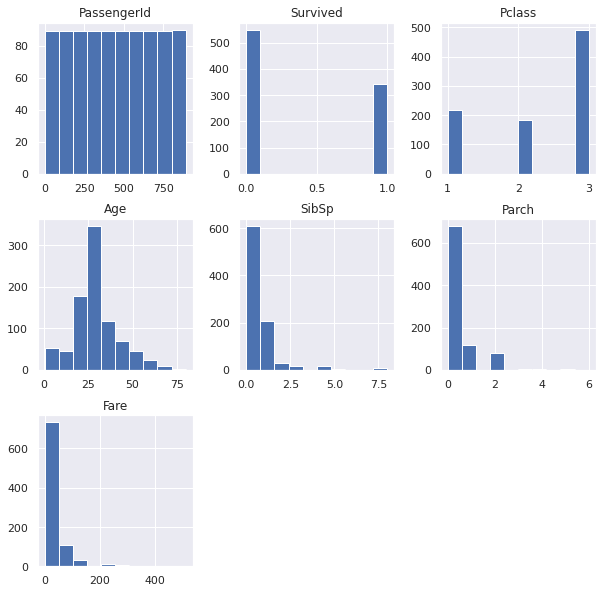

In [99]:
# Analise distributon
df.hist(figsize=(10,10))
plt.show()

In [100]:
# We can see the pairwise correlation between variables. A value near 0 means low correlation
# while a value  near -1 or 1 indicates strong correlation.
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


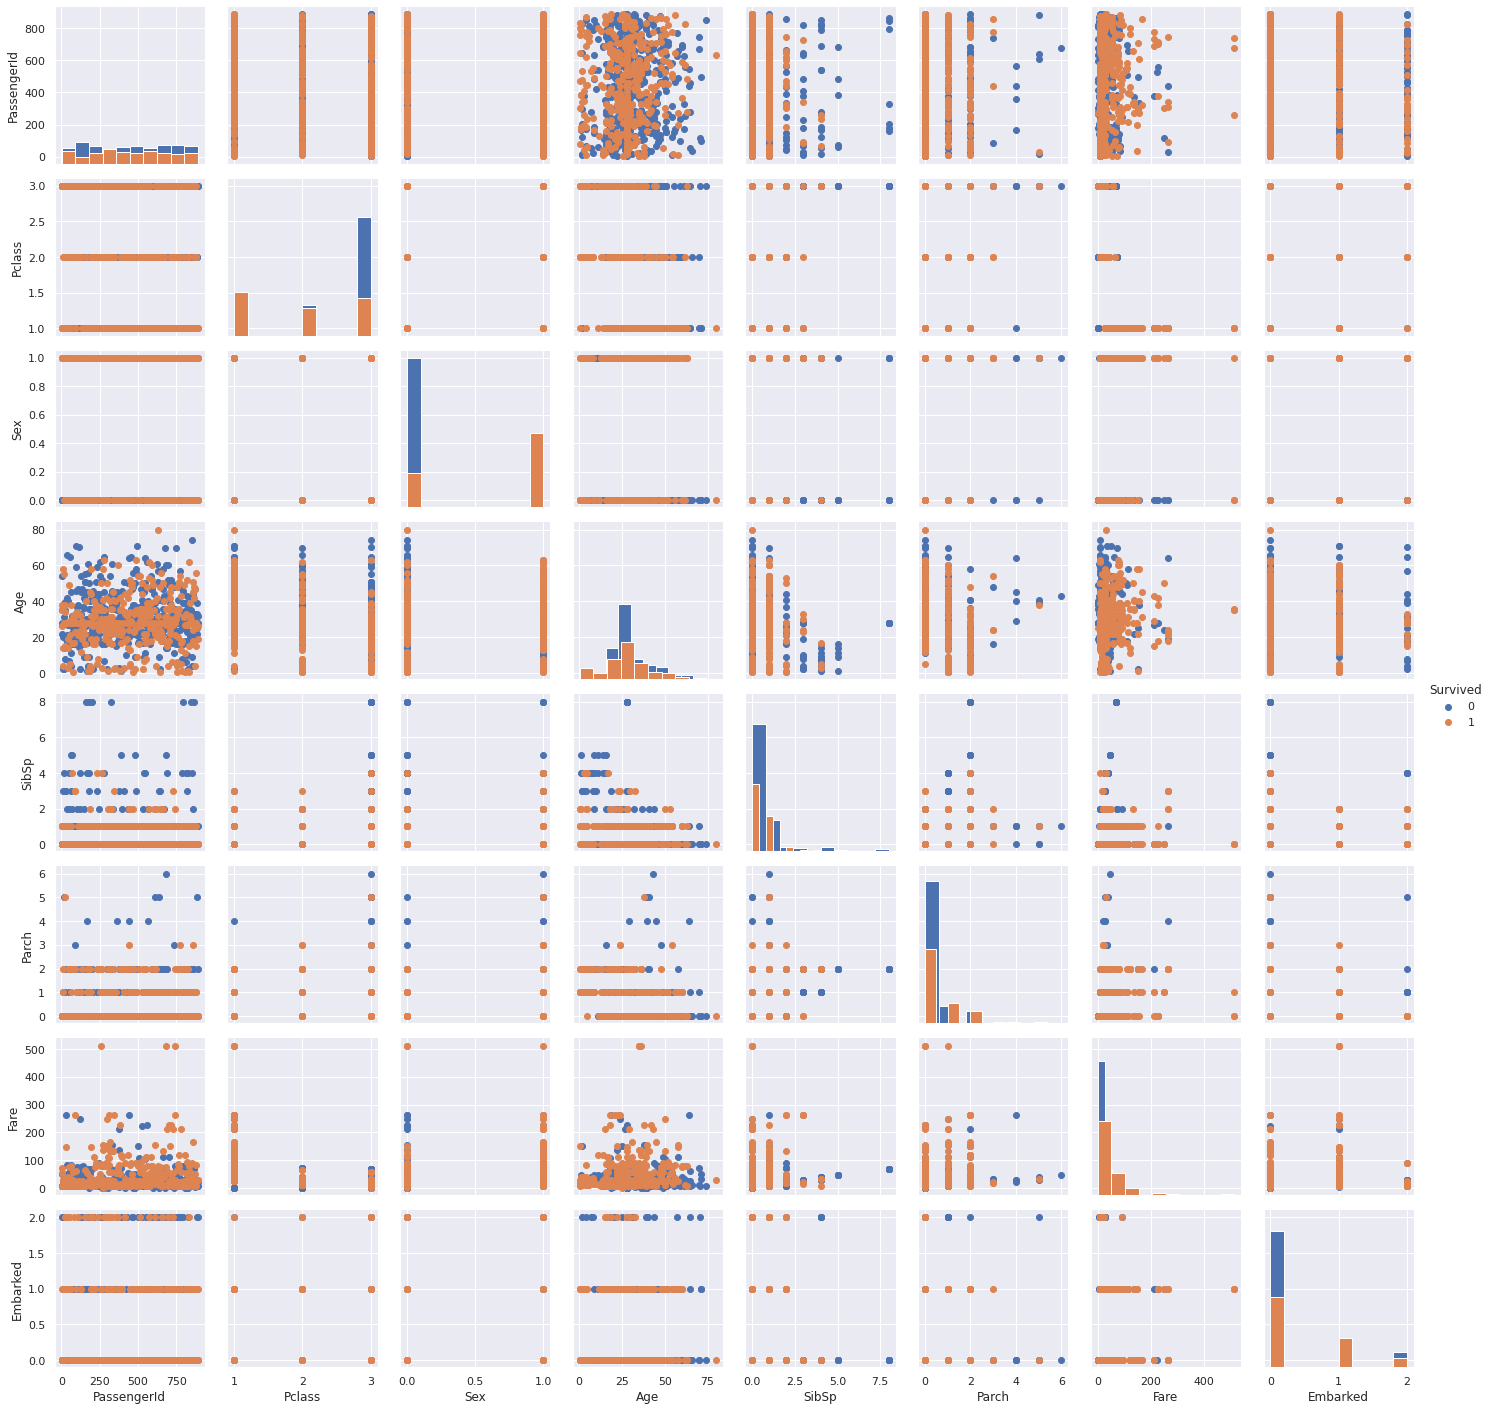

In [101]:
# General description of relationship betweek variables uwing Seaborn PairGrid
# We use df_clean, since the null values of df would gives us an error, you can check it.
g = sns.PairGrid(df_clean, hue="Survived")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

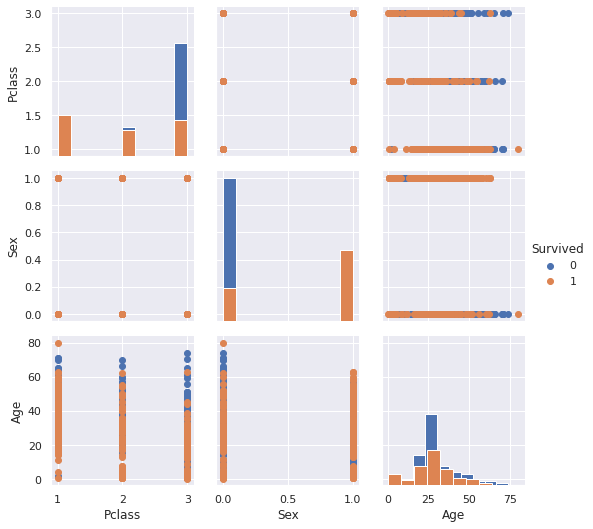

In [107]:
# PairGrid of variables
g = sns.PairGrid(df_clean, hue="Survived", vars=['Pclass', 'Sex', 'Age'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

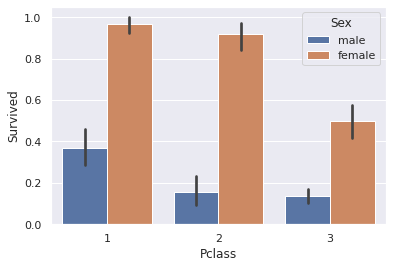

In [108]:
sns.barplot(x="Pclass", y='Survived', hue='Sex', data=df)